# Analisis exploratorio de datos (EDA)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns

def boxplotAndHist(na, binwidth=0.5):
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    # assigning a graph to each ax
    sns.boxplot(na, orient="h", ax=ax_box)
    sns.histplot(na, binwidth=binwidth, ax=ax_hist)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    plt.show()



## Análisis de tipos

In [33]:
dic = {
    "columnaDesnormalizada": [1, 13, "16", 25.2, np.nan, 32],
    "columnaCategorica": ["Grande", "Mediano", "Peque", "Grande", "Peque", "Grande"],
    "columnaTexto":["-", "Dr", "Sr", "Ing", "+", "n"],
    "columnaCatNoOrdinal": ["Rojo", "Verde", "Verde", "Verde", "Verde", "Rojo"],
}

df = pd.DataFrame(dic)

Observar los tipos. Son object. En la primera columna es claro, dado que la misma esta muy poco formalizada. Sera conveniente trabajar con flotantes ya que la naturaleza del dato es flotante, se ganara en eficiencia general. En la segunda columna es una cadena puede almacenarse como object o la solución recomandada es usar StringDtype. ¿Por que? Porque object puede almacenar cualquier cosa, con StringDtype nos aseguramos cadenas. 

In [34]:
df.dtypes

columnaDesnormalizada    object
columnaCategorica        object
columnaTexto             object
columnaCatNoOrdinal      object
dtype: object

Convertimos

In [35]:
df["columnaDesnormalizada"] = df["columnaDesnormalizada"].astype("float")
df.dtypes

columnaDesnormalizada    float64
columnaCategorica         object
columnaTexto              object
columnaCatNoOrdinal       object
dtype: object

In [36]:
df["columnaCategorica"] = df["columnaCategorica"].astype("string")
df["columnaTexto"] = df["columnaTexto"].astype("string")
df["columnaCatNoOrdinal"] = df["columnaCatNoOrdinal"].astype("string")
#o
df["columnaCategorica"] = df["columnaCategorica"].astype(dtype=pd.StringDtype())

In [37]:
df.dtypes

columnaDesnormalizada           float64
columnaCategorica        string[python]
columnaTexto             string[python]
columnaCatNoOrdinal      string[python]
dtype: object

Los tipos incorrectos aumentan la carga de procesamiento

In [38]:
vals = np.random.randint(0, 10, 10000000)    
ovals = vals.astype("object")
print(vals.dtype, ovals.dtype)


int32 object


In [39]:
%timeit vals/4 

51.7 ms ± 4.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [40]:
%timeit ovals/4

1.48 s ± 450 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Los tiempos son mucho mas rápidos cuando utilizo el tipo de dato que corresponde, incluso puede llegar a utilizar optimizaciones de hardware  (SIMD, Single Instruction, Multiple Data).

## Análisis univariable

¿Que datos categóricos y que datos numericos tengo? ¿Los categóricos son ordinales?

¿Cuantos categoricos tengo en columna categórica?

In [41]:
df["columnaCategorica"].unique()

<StringArray>
['Grande', 'Mediano', 'Peque']
Length: 3, dtype: string

¿Cuantos categoricos (porcentaje) tengo en columna texto?

In [42]:
len(df["columnaTexto"].unique())/len(df)

1.0

¿Cuantos categoricos tengo en columna CatNoOrdinal?


In [43]:
df["columnaCatNoOrdinal"]

0     Rojo
1    Verde
2    Verde
3    Verde
4    Verde
5     Rojo
Name: columnaCatNoOrdinal, dtype: string

In [44]:
len(df["columnaCatNoOrdinal"].unique())

2

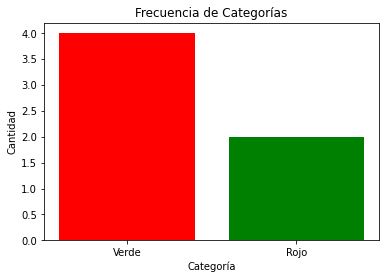

In [45]:
cateries = df["columnaCatNoOrdinal"].value_counts()
plt.bar(cateries.index, cateries.values, color=['red', 'green'])
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.title('Frecuencia de Categorías')
plt.show()

Para analizar datos algo mas complejos cargamos un dataset sintetico.

In [47]:
df = pd.read_csv("../datasets/synthetic.csv")

¿Tenemos datos duplicados?

In [48]:
print("Cantidad:",  df.duplicated().sum())
df[df.duplicated()].head()


Cantidad: 5


,id,Weight,Heigth,CorrPar01,CorrPar02,CorrTot01,CorrTot02,column90PercentNulls,columnBarValues,columnTwoNulls,SomeNulls,columnOutliers,Salary,ActStatus,date
100000,88104,69.226322,150.799334,-0.273928,-21.055996,1.440683,114.042371,NaN,49.040106,104.438337,117.749759,340.312281,NaN,EMPLEADO,2023-02-03
100001,52364,80.976302,180.188782,-0.803141,-40.831536,-0.901678,-71.375521,NaN,51.807308,112.479476,104.488652,457.512857,947.816159,EMPLEADO,2023-04-09
100002,94725,63.885500,172.952125,-0.597410,-54.147172,0.665158,52.652988,82.138536,50.184573,100.960237,84.059556,1448.085003,NaN,CUENTAPROPISTA,2023-08-23
100003,74576,68.157261,168.886285,0.059369,44.827098,-1.032518,-81.732629,NaN,50.229093,109.346927,100.015719,1130.963717,548.814551,EMPLEADO,2023-10-23
100004,6537,86.045595,154.739006,-0.198607,-27.297896,0.294288,23.295410,NaN,48.312704,81.295609,90.422749,432.290853,NaN,EMPLEADO,2023-10-08


In [49]:
df.loc[df.id==88104]

,id,Weight,Heigth,CorrPar01,CorrPar02,CorrTot01,CorrTot02,column90PercentNulls,columnBarValues,columnTwoNulls,SomeNulls,columnOutliers,Salary,ActStatus,date
88103,88104,69.226322,150.799334,-0.273928,-21.055996,1.440683,114.042371,NaN,49.040106,104.438337,117.749759,340.312281,NaN,EMPLEADO,2023-02-03
100000,88104,69.226322,150.799334,-0.273928,-21.055996,1.440683,114.042371,NaN,49.040106,104.438337,117.749759,340.312281,NaN,EMPLEADO,2023-02-03


In [50]:
df.drop_duplicates(inplace=True)

¿Tenemos nulos?

In [51]:
df.isna().sum()/df.shape[0]*100

id                       0.000
Weight                   0.000
Heigth                   0.000
CorrPar01                0.000
CorrPar02                0.000
CorrTot01                0.000
CorrTot02                0.000
column90PercentNulls    90.000
columnBarValues          0.000
columnTwoNulls           0.002
SomeNulls               10.000
columnOutliers           0.000
Salary                  40.000
ActStatus                5.000
date                     0.000
dtype: float64

Tengo columnas con 90% de nulos y columnas con solo un 0.002% de nulos

Outliers y valores erroneos

In [52]:
df[["Weight", "Heigth"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,100000.0,69.948259,10.004669,22.044648,63.203979,69.964002,76.710926,110.397644
Heigth,100000.0,170.062207,10.002598,129.897125,163.308978,170.044103,176.847829,350.000000


array([[<Axes: title={'center': 'Heigth'}>]], dtype=object)

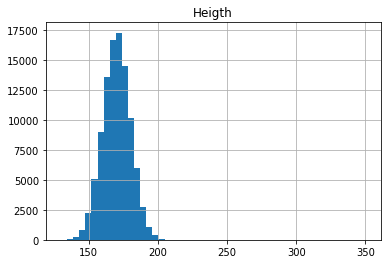

In [53]:
df[["Heigth"]].hist(bins=50)

El boxplot ayuda  descubrir outliers ocultos

<Axes: >

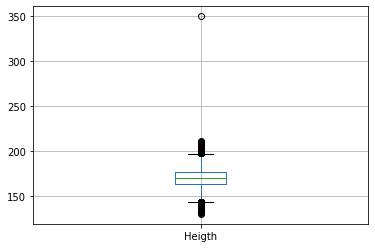

In [54]:
df[["Heigth"]].boxplot()

Boxplot segun distribuciones

In [55]:
vals_nor_1 = np.random.normal(0, 1, 1000)
vals_nor_2 = np.random.normal(0, 2, 1000)
vals_nor_3 = np.random.normal(0, 4, 1000)

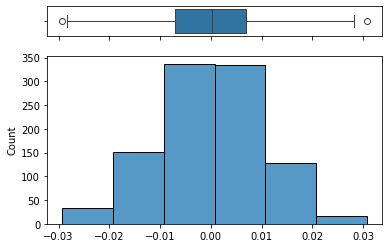

In [82]:
boxplotAndHist(vals_nor_1, binwidth=0.1)

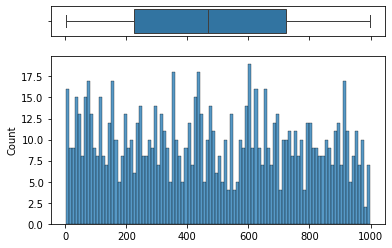

In [56]:
del vals_nor_1, vals_nor_2, vals_nor_3

vals_uni_1 = np.random.uniform(0, 1000, 1000)
boxplotAndHist(vals_uni_1, binwidth=10)

Errores de procesamiento

El histograma puede ayudar a ver la distribucion de los datos, errores de ingreso de datos y dependiendo de la naturaleza de los datos, puede ayudar identificar sesgo

<Axes: >

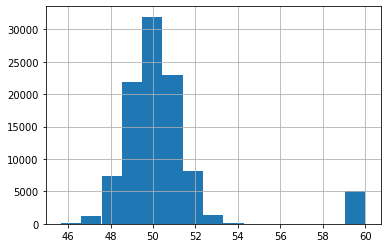

In [57]:
df["columnBarValues"].hist(bins=15)

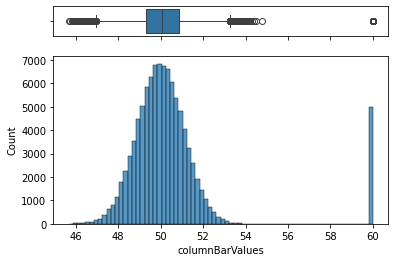

In [58]:
boxplotAndHist(df["columnBarValues"], binwidth=0.2)

## Analisis bivariable

Matriz de correlación. Correlación y Correlación perfecta

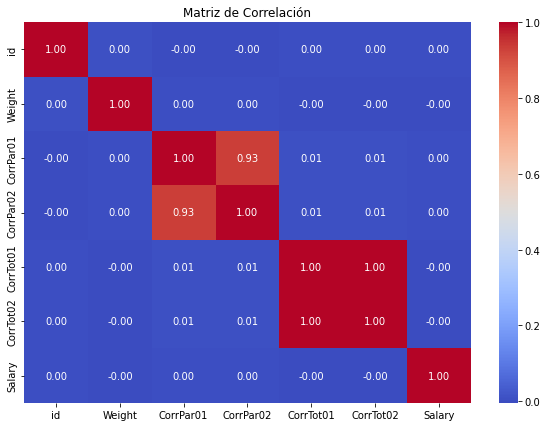

In [59]:
fig, ax = plt.subplots(figsize=(10,7))
mat = df[["id", "Weight", "CorrPar01", "CorrPar02", "CorrTot01", "CorrTot02", "Salary"]].select_dtypes(include=['int', 'float']).corr()
sns.heatmap(mat, annot=True, cmap='coolwarm', fmt=".2f",  ax=ax)
plt.title('Matriz de Correlación')
plt.show()

Análisis de variables de a pares. Distribuciones y relaciones

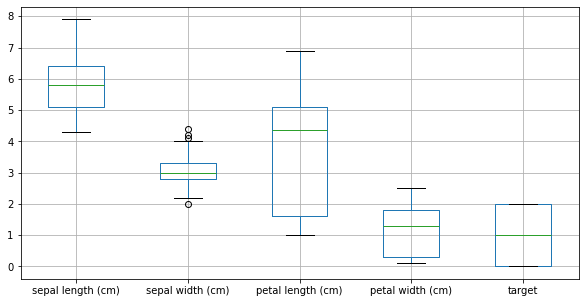

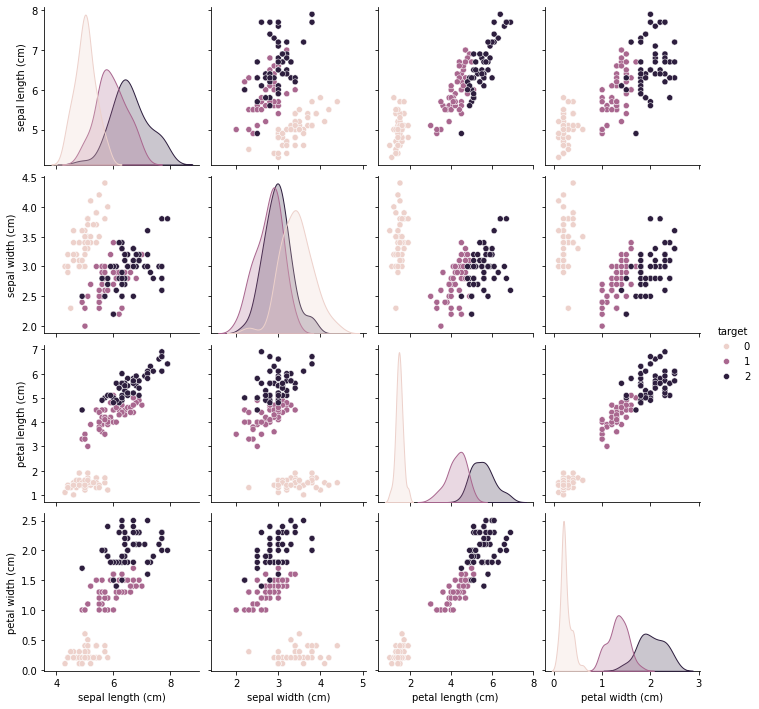

In [61]:
import pandas as pd
from sklearn import datasets
skdf = datasets.load_iris(as_frame=False)
df = pd.DataFrame(skdf["data"], columns=skdf['feature_names']) 
target = pd.Series(skdf["target"], name="target")
df = df.join(target)
df.boxplot(return_type='axes', figsize=(10,5))
sns.pairplot(df, hue="target")

In [62]:
df = pd.read_csv("../datasets/titanic.csv")


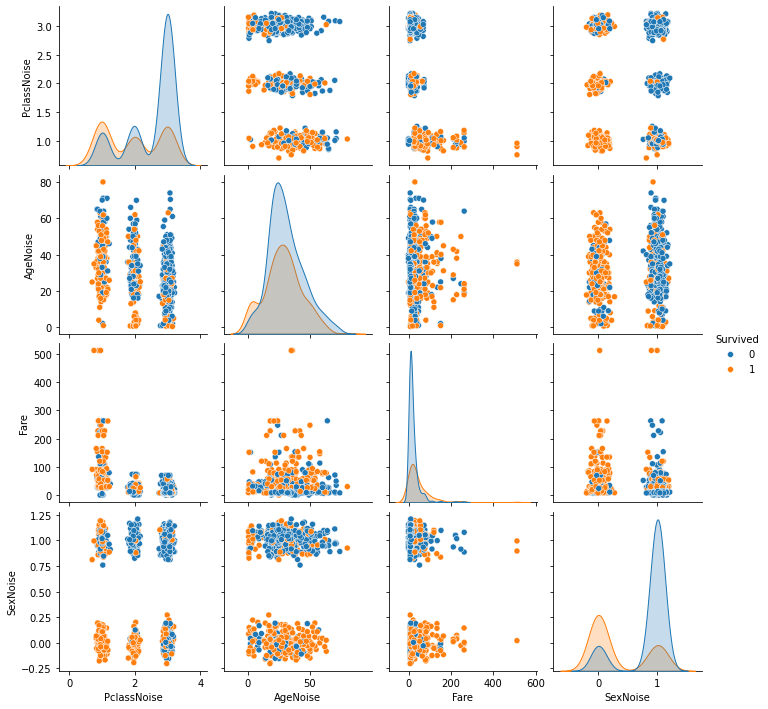

In [63]:
#Meto algo de ruido en pclass para obtener numeros floatantes que me permita ver
#densidad
df["Sex"] = df["Sex"].map({"male": 1, "female": 0})
df["PclassNoise"] = df["Pclass"]+np.random.normal(0, 0.08, df.shape[0]) 
df["AgeNoise"] = df["Age"]+np.random.normal(0, 0.08, df.shape[0])
df["SexNoise"] = df["Sex"]+np.random.normal(0, 0.08, df.shape[0])
sns.pairplot(df[["PclassNoise", "AgeNoise", "Survived", "Fare", "SexNoise"]], hue="Survived")
plt.show()

Datos categóricos, diagrama de barras

In [64]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'PclassNoise',
       'AgeNoise', 'SexNoise'],
      dtype='object')

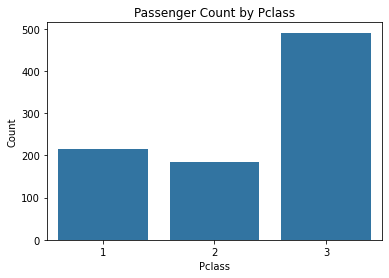

In [46]:
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Count by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

## Algunos análisis multivariables.

Diagrama de agrupación hexagonal

Permite ver la densidad cuando la cantidad de datos es demasiado grande y el scatter plot se muestra una nube de dificil interpretación.

In [68]:
df = pd.read_csv("../datasets/kc_tax.csv.gz")
dfFlt = df.loc[(df.TaxAssessedValue < 750000) & 
                     (df.SqFtTotLiving > 100) &
                     (df.SqFtTotLiving < 3500), :]

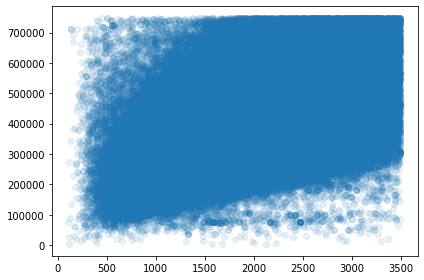

In [71]:
plt.plot(dfFlt.SqFtTotLiving, dfFlt.TaxAssessedValue, 'o', alpha=0.1)
plt.tight_layout()
plt.show()

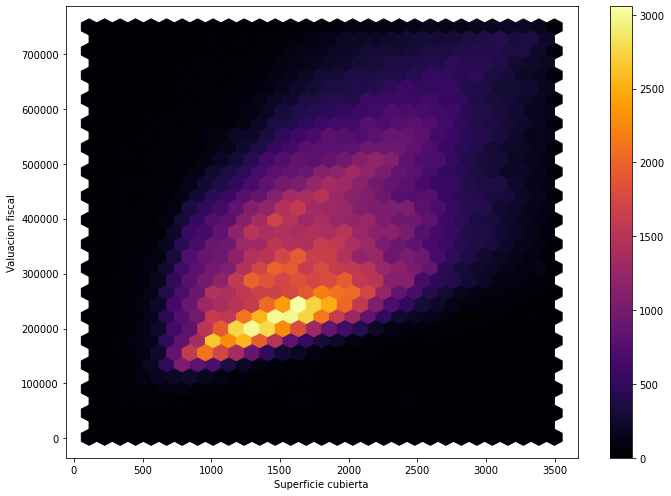

In [48]:
ax = dfFlt.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',cmap='inferno', gridsize=30, figsize=(10, 7))
ax.set_xlabel('Superficie cubierta')
ax.set_ylabel('Valuacion fiscal')

plt.tight_layout()
plt.show()